# Important concepts before starting
- **Weights**: Weights control the signal (or the strength of the connection) between two neurons. In other words, a weight decides how much influence the input will have on the output.
- **Biases**: Biases, which are constant, are an additional input into the next layer that will always have the value of 1. Bias units are not influenced by the previous layer (they do not have any incoming connections) but they do have outgoing connections with their own weights. The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron.
- **Hidden layers**: artificial neural network is a layer in between input layers and output layers, where artificial neurons take in a set of weighted inputs and produce an output through an activation function. Hidden layers are required if and only if the data must be separated non-linearly.
- **Activation function**: An activation function is a function that converts the input given (the input, in this case, would be the weighted sum) into a certain output based on a set of rules (logistic, relu, etc).
<hr>
- For a numerical output, if we have only 1 input and 1 output layer (1 neuron each), and we have input=15, weight=1.5 and bias=4 -> Then the result is 15 * 1.5 + 4 = 26.5

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -17, -10, 0, 8, 15, 22, 38, 80], dtype=float)
fahrenheit = np.array([-40, 1.4, 14, 32, 46, 59, 72, 100, 176], dtype=float)

In [3]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer])

#hidden1 = tf.keras.layers.Dense(units=3, input_shape=[1])
#hidden2 = tf.keras.layers.Dense(units=3)
#output = tf.keras.layers.Dense(units=1)
#model = tf.keras.Sequential([hidden1, hidden2, output])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
print("Starting training...")
history = model.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Model has been trained!")

Starting training...
Model has been trained!


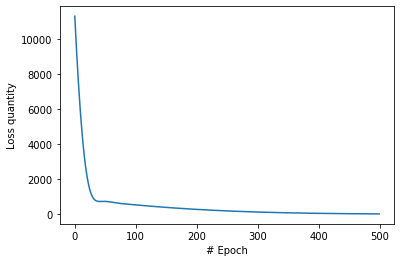

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss quantity")
plt.plot(history.history["loss"])

In [8]:
# Prediction example
result = model.predict([100.0])
print("The result is " + str(result) + " fahrenheit!")

1/1 [==============================] - 0s 101ms/step
The result is [[211.5767]] fahrenheit!


In [9]:
print("Internal model variables")
print(layer.get_weights())
#print(hidden1.get_weights())
#print(hidden2.get_weights())
#print(output.get_weights())

Internal model variables
[array([[1.8396245]], dtype=float32), array([27.614252], dtype=float32)]


- In this case and for 500 steps, the weight is ~= 1.83 and bias ~= 27.8. So the calculation for convert 100 celcius to farenheit is 100 * 1.8378 + 27.80 = 211.58. The true value is 212 so is close and the trained worked quite fine.

## Retraining with more steps

In [10]:
# Training the model with 500 additional steps to be more accurate
#retrain_history = history.model.fit(celsius, fahrenheit, epochs=500, verbose=False) # Approach 1
retrain_history = model.fit(celsius, fahrenheit, epochs=500, verbose=False) # Approach 2

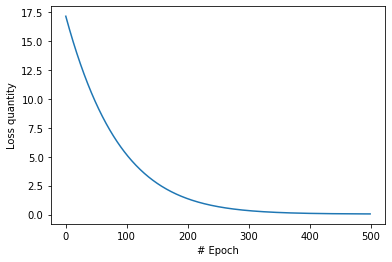

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Loss quantity")
plt.plot(retrain_history.history["loss"])

In [12]:
# Prediction example
result = model.predict([100.0])
print("The result is " + str(result) + " fahrenheit!")

1/1 [==============================] - 0s 43ms/step
The result is [[211.8983]] fahrenheit!


In [13]:
print("Internal model variables")
print(layer.get_weights())
#print(hidden1.get_weights())
#print(hidden2.get_weights())
#print(output.get_weights())

Internal model variables
[array([[1.8003604]], dtype=float32), array([31.862265], dtype=float32)]


- Now the weight is ~= 1.80 and bias ~= 31.89. So the calculation for convert 100 celcius to farenheit is 100 * 1.80 + 31.89 = 211.9. Now the calculation is even more accurate

The original formula to convert celcius to faranheit is **celcius_val * 1.8 + 32**. So the model is close to those values with a few layers and steps

# Saving and exporting model (to use with TensorflowJS)

In [14]:
# .h5 format
model_filename = 'celsius_to_farenheit.h5'
model.save(model_filename)

In [16]:
# Install the library to use TensorflowJS
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 588.3 MB 5.7 kB/s 
     |████████████████████████████████| 40 kB 5.7 MB/s 
     |████████████████████████████████| 16.2 MB 502 kB/s 
     |████████████████████████████████| 189 kB 47.4 MB/s 
     |████████████████████████████████| 8.3 MB 35.3 MB/s 
     |████████████████████████████████| 237 kB 54.5 MB/s 
     |████████████████████████████████| 154 kB 58.3 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 1.7 MB 38.0 MB/s 
     |████████████████████████████████| 6.0 MB 38.5 MB/s 
     |████████████████████████████████| 439 kB 47.6 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
    

In [43]:
# Exporting model into the new output folder
!mkdir output_folder
!tensorflowjs_converter --input_format keras $model_filename output_folder  # Generates bin and json files

mkdir: cannot create directory ‘output_folder’: File exists
2022-11-24 18:45:19.397304: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 18:45:19.397570: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 18:45:19.397605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [44]:
# Use these files to perform the inference in the web
...